# K-means clustering algorithms

In [30]:
# https://scikit-learn-extra.readthedocs.io/en/stable/auto_examples/cluster/plot_clustering.html#sphx-glr-auto-examples-cluster-plot-clustering-py
# https://scikit-learn-extra.readthedocs.io/en/stable/auto_examples/cluster/plot_kmedoids_digits.html#sphx-glr-auto-examples-cluster-plot-kmedoids-digits-py

In [31]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [32]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [33]:
from sklearn import mixture, cluster, manifold
from sklearn.manifold import TSNE, Isomap
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering, MiniBatchKMeans
from sklearn.cluster import OPTICS, cluster_optics_dbscan
from sklearn.decomposition import PCA, SparsePCA, NMF, FastICA, MiniBatchNMF, LatentDirichletAllocation, KernelPCA
from sklearn.preprocessing import MinMaxScaler, minmax_scale, MaxAbsScaler, StandardScaler, RobustScaler, Normalizer, QuantileTransformer, PowerTransformer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import kneighbors_graph, NeighborhoodComponentsAnalysis
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn import metrics
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import BisectingKMeans
from sklearn.cluster import SpectralBiclustering
from sklearn.cluster import SpectralCoclustering

import umap
from umap import UMAP
import hdbscan

import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import pandas as pd
import numpy as np
from numpy import genfromtxt

import seaborn as sns
import matplotlib.cm as cm
from matplotlib import offsetbox

sns.set_style('darkgrid', {'axes.facecolor': '.9'})
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')
%matplotlib inline

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

from scipy.cluster.hierarchy import dendrogram, linkage ,fcluster
from collections import Counter
from sklearn import preprocessing
import itertools
import random
from scipy.spatial import distance as ssd
from tqdm import tqdm
import scipy
import scipy.sparse 
from scipy.stats import pearsonr
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import kneighbors_graph 
from scipy.sparse.linalg import expm
from scipy.linalg import solve_banded
from scipy.spatial.distance import pdist
import scipy.spatial.distance
from sklearn.metrics.pairwise import euclidean_distances
import math
from collections import Counter
import sklearn
import os.path

import scipy.sparse as sp
from scipy.sparse.linalg import eigsh
from sklearn.cluster import k_means
from sklearn.cluster import SpectralClustering
from sklearn.metrics import normalized_mutual_info_score as nmi
from sklearn.cluster import AffinityPropagation

from sklearn_extra.cluster import CommonNNClustering
from sklearn.preprocessing import StandardScaler

from time import time

from sklearn_extra.robust import RobustWeightedKMeans#, CLARA
from sklearn.manifold import TSNE, LocallyLinearEmbedding, Isomap, MDS, SpectralEmbedding
from sklearn.decomposition import PCA
from MulticoreTSNE import MulticoreTSNE
from openTSNE import TSNE as OpenTSNE
from umap import UMAP

#%matplotlib inline
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

plt.ion()
plt.show()

In [34]:
solution = pd.read_csv('../solution_20000.csv')
solution

,Cx,Cy,Cz,DUDt:0,DUDt:1,DUDt:2,Eta1,Eta2,Eta3,Eta4,...,gradk:1,gradk:2,gradp:0,gradp:1,gradp:2,k,nut,omega,p,vtkOriginalIndices
0,0.024022,1.000130,0.089286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000162,-5.780230e-23,1.638920,0.008640,6.437620e-22,1.000000e-10,0.0,89220.4,1.821710e-09,0
1,0.048045,1.000200,0.089286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000172,4.634120e-19,1.002830,0.004400,3.881760e-14,1.000000e-10,0.0,89225.4,3.632550e-02,1
2,0.096085,0.999939,0.089286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000174,8.886920e-19,0.104329,0.002251,5.763690e-14,1.000000e-10,0.0,89244.9,5.394950e-02,2
3,0.144081,0.998347,0.089286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000147,5.877580e-19,0.014166,-0.005132,3.417090e-14,1.000000e-10,0.0,89415.0,4.632440e-02,3
4,0.191904,0.994341,0.089286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000101,2.599370e-19,0.179853,-0.020441,2.959300e-14,1.000000e-10,0.0,90129.4,5.534090e-02,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64717,8.820000,3.035710,0.089286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.000065,-1.110470e-25,-0.061211,0.000000,-4.651490e-20,1.000000e-10,0.0,88712.9,1.302640e-01,64717
64718,8.865000,3.035710,0.089286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.000066,1.322870e-31,-0.030995,0.000000,8.682270e-25,1.000000e-10,0.0,89061.8,1.263240e-01,64718
64719,8.910000,3.035710,0.089286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.000065,3.256430e-19,-0.090482,0.000000,1.419180e-13,1.000000e-10,0.0,89201.1,1.274730e-01,64719
64720,8.955000,3.035710,0.089286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.000066,6.808460e-19,0.018004,0.000000,2.525830e-13,1.000000e-10,0.0,89223.5,1.181820e-01,64720


In [35]:
y = np.ones(solution.shape)
X_train, X_test, y_train, y_test = train_test_split(solution, y, test_size=0.20, random_state=42)

In [36]:
X = X_test

In [37]:
# Calculate the correlation matrix and take the absolute value
absspearmancorr = X.corr(method='spearman')#.abs()
print(absspearmancorr)

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(absspearmancorr, dtype=bool))
tri_df = absspearmancorr.mask(mask)
print("Mask"); print(tri_df)

# List column names of highly correlated features (r > 0.95)
to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.95)]
print("Dropped features"); print(to_drop)

# Drop the features in the to_drop list
reduced_spearmancorr_df = X.drop(to_drop, axis=1)
print(); print("Reduced dataset"); print(reduced_spearmancorr_df)

to_keep_spearman = [c for c in reduced_spearmancorr_df.columns]
print("Kept features"); print(to_keep_spearman)

print(f"The reduced_df DataFrame has {reduced_spearmancorr_df.shape[1]} columns.")

                          Cx        Cy  Cz    DUDt:0    DUDt:1    DUDt:2  \
Cx                  1.000000  0.000870 NaN  0.182658  0.026854  0.001056   
Cy                  0.000870  1.000000 NaN -0.056551 -0.658027  0.007550   
Cz                       NaN       NaN NaN       NaN       NaN       NaN   
DUDt:0              0.182658 -0.056551 NaN  1.000000  0.043301  0.017556   
DUDt:1              0.026854 -0.658027 NaN  0.043301  1.000000 -0.017388   
...                      ...       ...  ..       ...       ...       ...   
k                   0.133787 -0.229682 NaN -0.044693  0.406125 -0.017611   
nut                 0.071978 -0.183660 NaN -0.044696  0.411886 -0.019808   
omega              -0.022120  0.123488 NaN  0.046356 -0.306658  0.020471   
p                   0.502830 -0.068595 NaN -0.127722 -0.071528 -0.001453   
vtkOriginalIndices  0.017773  0.478586 NaN -0.031382 -0.367581  0.001164   

                        Eta1      Eta2      Eta3      Eta4  ...   gradk:1  \
Cx        

In [38]:
to_drop = ['Cx','Cy','Cz','DUDt:0','DUDt:1','DUDt:2','U:2','Eta3','Eta4','I1','I4','Oijt:0','Oijt:2','Oijt:4','Oijt:5','Oijt:6','Oijt:7','Oijt:8','Q1','Q5','Q10','T1:2','T1:4','T1:5','T2:2','T2:4','T2:5','T3:0', 'T3:1', 'T3:2', 'T3:3', 'T3:4', 'T3:5', 'T4:3', 'T4:4', 'T4:5', 'T5:0', 'T5:1', 'T5:2', 'T5:3', 'T5:4', 'T5:5', 'T6:0', 'T6:1', 'T6:2', 'T6:3', 'T6:4', 'T6:5', 'T7:4','T7:5','T8:2','T8:4','T8:5','T9:1','T9:2','T9:3','T9:4','T9:5','T10:2', 'T10:3', 'T10:4', 'T10:5','bij:2', 'bij:4', 'bij:5', 'epsilon', 'gradU:0', 'gradU:1', 'gradU:2', 'gradU:3', 'gradU:4', 'gradU:5', 'gradU:6', 'gradU:7', 'gradU:8', 'gradk:0', 'gradk:1', 'gradk:2','gradp:2','omega', 'p', 'vtkOriginalIndices']
print("Dropped features"); print(to_drop)
further_reduced_spearmancorr_df = reduced_spearmancorr_df.drop(to_drop, axis=1)
further_reduced_spearmancorr_df

Dropped features
['Cx', 'Cy', 'Cz', 'DUDt:0', 'DUDt:1', 'DUDt:2', 'U:2', 'Eta3', 'Eta4', 'I1', 'I4', 'Oijt:0', 'Oijt:2', 'Oijt:4', 'Oijt:5', 'Oijt:6', 'Oijt:7', 'Oijt:8', 'Q1', 'Q5', 'Q10', 'T1:2', 'T1:4', 'T1:5', 'T2:2', 'T2:4', 'T2:5', 'T3:0', 'T3:1', 'T3:2', 'T3:3', 'T3:4', 'T3:5', 'T4:3', 'T4:4', 'T4:5', 'T5:0', 'T5:1', 'T5:2', 'T5:3', 'T5:4', 'T5:5', 'T6:0', 'T6:1', 'T6:2', 'T6:3', 'T6:4', 'T6:5', 'T7:4', 'T7:5', 'T8:2', 'T8:4', 'T8:5', 'T9:1', 'T9:2', 'T9:3', 'T9:4', 'T9:5', 'T10:2', 'T10:3', 'T10:4', 'T10:5', 'bij:2', 'bij:4', 'bij:5', 'epsilon', 'gradU:0', 'gradU:1', 'gradU:2', 'gradU:3', 'gradU:4', 'gradU:5', 'gradU:6', 'gradU:7', 'gradU:8', 'gradk:0', 'gradk:1', 'gradk:2', 'gradp:2', 'omega', 'p', 'vtkOriginalIndices']


,Eta2,Oijt:1,Q2,Q4,Q7,Q8,Q9,T1:3,T8:0,T8:1,T8:3,U:0,U:1,bij:0,bij:1,bij:3,gradp:0,gradp:1,k,nut
50867,-0.047190,1.131990,0.016751,0.399363,0.021917,3.596960e-02,0.581762,0.512365,-0.581152,0.581152,0.544089,1.122580,0.010398,-0.022537,0.022537,-0.024361,-0.027815,0.022878,1.073500e-02,1.591180e-02
1003,-0.019056,0.707842,0.021272,0.432447,0.286177,4.181890e-03,0.586169,0.706974,-0.500423,0.500423,-0.004860,0.088095,0.000245,0.000174,-0.000174,-0.013471,0.468282,0.017510,7.419560e-05,5.593330e-08
38126,-0.066836,0.674840,0.992681,0.414625,0.014661,1.046630e-05,0.572723,0.682338,-0.460470,0.460470,0.125152,0.012587,-0.002745,-0.012399,0.012399,-0.045604,0.022712,-0.008143,1.140790e-02,2.522220e-03
144,0.000000,-0.707105,0.057666,0.414469,0.011796,6.453490e-10,0.584624,-0.707105,-0.499997,0.499997,-0.001157,0.000000,0.000000,0.000000,0.000000,0.000000,0.019431,0.000000,1.000000e-10,0.000000e+00
31651,-0.017443,-0.707107,0.007354,0.415514,0.014271,5.610540e-05,0.584625,-0.707107,-0.500000,0.500000,0.000199,0.090660,-0.000009,0.000005,-0.000005,0.012334,0.023488,-0.000230,3.487380e-05,3.193620e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44269,-0.168316,0.909069,0.827677,0.414298,0.003420,1.356670e-03,0.550788,0.704587,-0.640523,0.640523,0.052860,-0.087377,0.023689,-0.009828,0.009845,-0.118590,0.002823,-0.004902,1.976410e-02,1.131790e-02
55854,-0.213682,-0.705229,0.016699,0.389809,0.031735,8.024060e-02,0.581210,-0.702937,-0.495732,0.495732,-0.054043,0.970565,0.009534,-0.016373,0.016372,0.150205,-0.052111,0.000089,7.998450e-03,2.318200e-03
4456,-0.131046,-0.640734,0.130854,0.413909,0.009839,7.944590e-04,0.578399,-0.316475,-0.202649,0.202649,0.404977,-0.121210,0.076859,0.082813,-0.082813,0.041477,-0.000683,-0.016200,1.552930e-03,1.628540e-04
27024,-0.219203,-0.707122,0.031180,0.423426,0.014464,4.502690e-02,0.587663,-0.706935,-0.499890,0.499890,0.010993,0.773696,-0.001908,0.003408,-0.003408,0.154962,0.023715,-0.002077,9.628740e-03,6.226200e-04


In [45]:
X = further_reduced_spearmancorr_df[['Q2','Q4','Q7','Q8','Q9']]

In [41]:
clustering_algorithms = (
                        ("MiniBatchKMeans", two_means),               #1
                        ("AffinityPropagation", affinity_propagation),#2
                        ("MeanShift", ms),                            #3
                        ("SpectralClustering", spectral),             #4
                        ("DBSCAN", dbscan),                           #5
                        ("HDBSCAN", hdbscan),                         #6
                        ("OPTICS", optics),                           #7
                        ("Birch", birch),                             #8
                        ("GaussianMixture", gmm),                     #9
                        ("K-Medoid", kmedoid),                        #10
                        ("Robust K-Means", kmeans_rob),               #11
                        ("AgglomerativeClustering", agglomerative),   #12
                        ("PCA_GMM", pcagmm),                          #13
                        #("kPCA_GMM", kpcagmm),
                        ("SparsePCA_GMM", sparsepcagmm),              #14
                        ("ICA_GMM", icagmm),                          #15
                        ("tSNE_GMM", tsnegmm),                        #16
                        ("BisectingKMeans", bisect_means),            #17
                        #("SpectralBiclustering", bispectral),        #18
                        #("SpectralCoclustering", cospectral),        #19
                        )

In [46]:
rng = np.random.RandomState(42)

n_clusters = 4

kmeans               = KMeans(n_clusters=n_clusters, random_state=rng)
bisect_means         = BisectingKMeans(n_clusters=n_clusters, random_state=rng)
kmedoid              = KMedoids(n_clusters=n_clusters, random_state=rng) # metric="manhattan", metric="euclidean", metric="cosine"
two_means            = cluster.MiniBatchKMeans(n_clusters=n_clusters, random_state=rng)
spectral             = cluster.SpectralClustering(n_clusters=n_clusters, eigen_solver="arpack", affinity="nearest_neighbors", random_state=rng) 
bispectral           = cluster.SpectralBiclustering(n_clusters=n_clusters, random_state=rng) 
cospectral           = cluster.SpectralCoclustering(n_clusters=n_clusters, random_state=rng) 
dbscan               = cluster.DBSCAN()
hdbscan              = hdbscan.HDBSCAN(min_cluster_size=2)
optics               = cluster.OPTICS(min_samples=20, xi=0.1, min_cluster_size=0.2)
affinity_propagation = cluster.AffinityPropagation(damping=0.75, preference=-220, random_state=rng)
birch                = cluster.Birch(n_clusters=n_clusters)
gmm                  = mixture.GaussianMixture(n_components=n_clusters, covariance_type="full", random_state=rng)
kmeans_rob           = RobustWeightedKMeans(n_clusters, weighting="mom", max_iter=100, random_state=rng)

bandwidth            = cluster.estimate_bandwidth(X, quantile=0.2)
ms                   = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)

agglomerative        = cluster.AgglomerativeClustering(n_clusters=n_clusters)

ndimensions = 2

pca                  = PCA(n_components=ndimensions, random_state=rng)
pca.fit(X)
X_pca_array          = pca.transform(X)
X_pca                = pd.DataFrame(X_pca_array, columns=['PC1','PC2'])
pcagmm               = mixture.GaussianMixture(n_components=n_clusters, covariance_type="full", random_state=rng)
        
#pca                  = KernelPCA(n_components=None, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1, random_state=rng)
#pca.fit(X)
#X_pca_array          = pca.transform(X)
#X_pca                = pd.DataFrame(X_pca_array, columns=['PC1','PC2'])
#kpcagmm              = mixture.GaussianMixture(n_components=n_clusters, covariance_type="full", random_state=rng)

pca                  = SparsePCA(n_components=ndimensions, random_state=rng)
pca.fit(X)
X_pca_array          = pca.transform(X)
X_pca                = pd.DataFrame(X_pca_array, columns=['PC1','PC2'])
sparsepcagmm         = mixture.GaussianMixture(n_components=n_clusters, covariance_type="full", random_state=rng)

pca                  = FastICA(n_components=ndimensions, random_state=rng)
pca.fit(X)
X_pca_array          = pca.transform(X)
X_pca                = pd.DataFrame(X_pca_array, columns=['PC1','PC2'])
icagmm               = mixture.GaussianMixture(n_components=n_clusters, covariance_type="full", random_state=rng)
        
X_tSNE               = TSNE(n_components=ndimensions, learning_rate='auto', init='random', perplexity=30).fit_transform(X)
tsnegmm              = mixture.GaussianMixture(n_components=n_clusters, covariance_type="full", random_state=rng)

AttributeError: 'HDBSCAN' object has no attribute 'HDBSCAN'

/tmp/ipykernel_15088/2429592597.py:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pred = algorithm.labels_.astype(np.int)
/tmp/ipykernel_15088/2429592597.py:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in Nu

ValueError: num must be 1 <= num <= 15, not 16

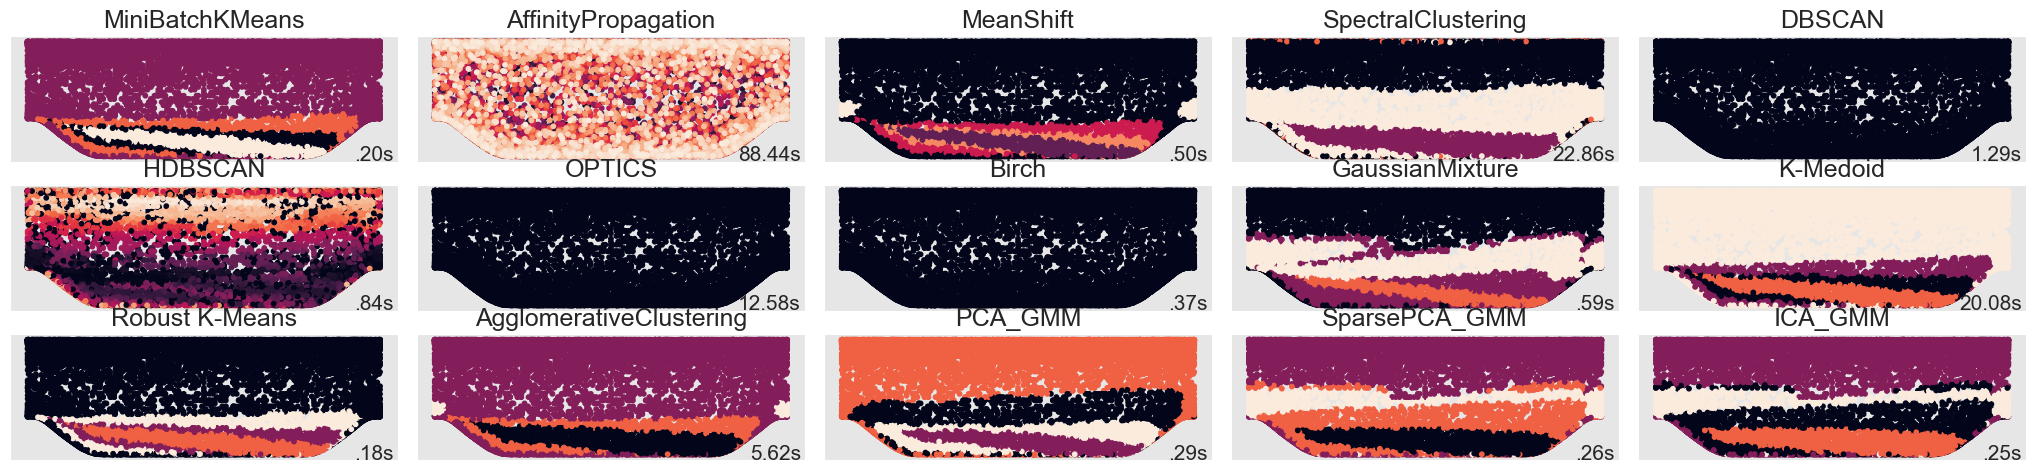

In [44]:
plot_num = 1
fig = plt.figure(figsize=(9 * 2 + 3, 5))
plt.subplots_adjust(left=0.02, right=0.98, bottom=0.001, top=0.85, wspace=0.05, hspace=0.18)

for name, algorithm in clustering_algorithms:
    t0 = time()
    algorithm.fit(X)
    t1 = time()

    if hasattr(algorithm, "labels_"):
        y_pred = algorithm.labels_.astype(np.int)
    else:
        y_pred = algorithm.predict(X)

    plt.subplot(3, int(len(clustering_algorithms) / 3), plot_num)
    plt.title(name, size=18)

    plt.savefig('clustering_algorithms.pdf')    
    
    plt.scatter(X_test['Cx'], X_test['Cy'], s=10, c=y_pred)
    plt.xticks(())
    plt.yticks(())
    plt.text(
            0.99,
            0.01,
            ("%.2fs" % (t1 - t0)).lstrip("0"),
            transform=plt.gca().transAxes,
            size=15,
            horizontalalignment="right",
    )
    plot_num += 1